# Lab03: Linear Regression and Decision Tree.

- Student ID: 20120113
- Student name: Lê Nguyên Khang

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.
- Decision Tree.

## Linear Regression

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n)$.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.
![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.
![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

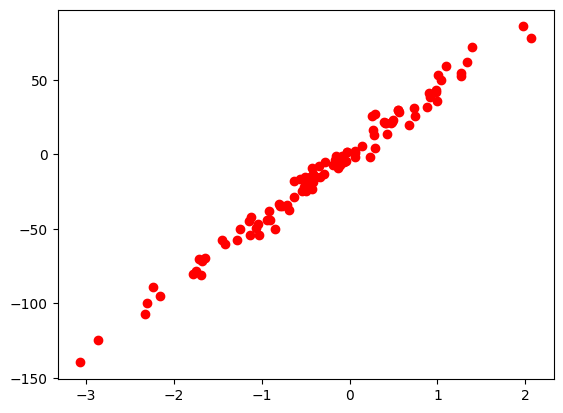

In [3]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()


**TODO:** 

- Your observation about data:

    - Dữ liệu được phân bố có xu hướng tạo thành một đường thẳng.
    - Các điểm dữ liệu được vẽ đa số nằm gần kề nhau thể hiện được sự liên tục của dữ liệu.
    
    -> Ta nhận thấy được có thể vẽ một đường thẳng đại diện lướt qua và thể hiện các điểm dữ liệu trên. Đó là đường hồi quy tuyến tính 


#### Training function

In [4]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    A = np.dot(X.T, X)
    b = np.dot(X.T, y)
    w = np.dot(np.linalg.pinv(A), b) 
    return w

In [5]:
# Construct one_added_X 
# TODO:
one = np.ones((X.shape[0], 1))
one_added_X = np.concatenate((one, X), axis = 1)
# First column of one_added_X is all ones (corresponding to x_0).

print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)


one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-3.32134481170146, 2.3242534868742357)

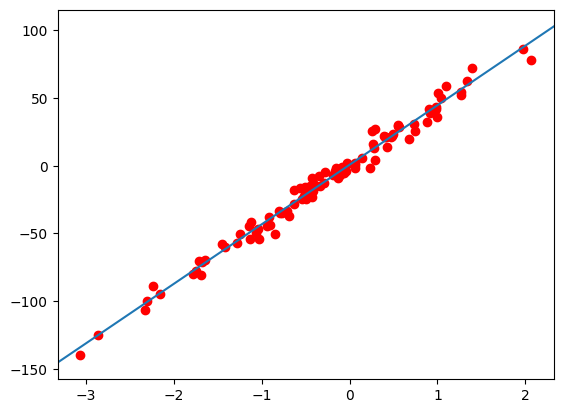

In [6]:
w = train_linear_regression(one_added_X, y)
# print(w)
# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
one = np.ones((xs.shape[0], 1))
ones_added_xs = np.concatenate((one, xs), axis = 1)
# First column of one_added_xs is all ones (corresponding to x_0).

predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)




- **TODO**: Discuss about advantages and disadvantages of `Linear Regression`:

`Advantages`:
- Là mô hình đơn giản dễ học dễ thực hiện, thực hiện được với các bài toán có ít dữ kiện.
- Giúp ta biểu diễn được mối quan hệ giữa biến phụ thuộc với một nhóm các biến độc lập. Từ đó dự đoán các biến phụ thuộc còn thiếu.

`Disadvantages`: 
- Bị ảnh hưởng mạnh bởi các điểm dữ liệu nhiễu. Nếu có điểm dữ liệu lệch xa so với tập dữ liệu chung sẽ khiến đường hồi quy bị ảnh hưởng lớn và lệch đi so với đường đi đúng. Ta cần phải tiền xử lý loại bỏ các điểm dữ liệu nhiễu để tránh bị ảnh hưởng như trên.
- Linear Regression không biểu diễn được các bài toán cho điểm dữ liệu phức tạp. Dễ thấy được các bài toán không phải lúc nào cũng cho tập điểm đẹp (xu hướng nằm trên đường thẳng như trên) mà nó nằm rất nhiều hình dạng khác nhau và như thế không thể biểu diễn được bằng Linear Regression.
- Ít được ứng dụng trong thực tế do các biến độc lập phải độc lập với nhau nhưng thực tế lại rất hiếm.

## Decision Tree

### 1. Import Library

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

### 2. Load Iris dataset

In [8]:
from sklearn.model_selection import train_test_split
iris=datasets.load_iris()

X=iris.data
y=iris.target

#split dataset into training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [4]:
type(iris.data)

numpy.ndarray

### 3. Decision Tree: Iterative Dichotomiser 3 (ID3)

#### 3.1 Information Gain

Expected value of the self-information (entropy):

$$Entropy=-\sum_{i}^{n}p_ilog_{2}(p_i)$$

The entropy function gets the smallest value if there is a value of $p_i$ equal to 1, reaches the maximum value if all $ p_i $ are equal. These properties of the entropy function make it is an expression of the disorder, or randomness of a system, ...

In [10]:
def entropy(counts, n_samples):
    """
    Parameters:
    -----------
    counts: shape (n_classes): list number of samples in each class
    n_samples: number of data samples
    
    -----------
    return entropy 
    """
    #TODO
    etp = []
    for i in counts:
        etp.append(i/n_samples)

    return -np.sum(etp*np.log2(etp))


In [11]:
def entropy_of_one_division(division): 
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    n_samples = len(division)
    n_classes = set(division)
    
    counts=[]
    #count samples in each class then store it to list counts
    #TODO:

    for i in n_classes:
        cc = 0
        for j in division:
            if j == i:
                cc += 1
        counts.append(cc)

    return entropy(counts,n_samples),n_samples


def get_entropy(y_predict, y):
    """
    Returns entropy of a split
    y_predict is the split decision by cutoff, True/Fasle
    """
    n = len(y)
    entropy_true, n_true = entropy_of_one_division(y[y_predict]) # left hand side entropy
    entropy_false, n_false = entropy_of_one_division(y[~y_predict]) # right hand side entropy
    # overall entropy
    #TODO s=?
    s = entropy_true*(n_true/n) + entropy_false*(n_false/n)
    return s

The information gain of classifying information set D by attribute A:
$$ Gain(A)=Entrophy(D)-Entrophy_{A}(D)$$

At each node in ID3, an attribute is chosen if its information gain is highest compare to others.

All attributes of the Iris set are represented by continuous values. Therefore we need to represent them with discrete values. The simple way is to use a `cutoff` threshold to separate values of the data on each attribute into two part:` <cutoff` and `> = cutoff`.

To find the best `cutoff` for an attribute, we replace` cutoff` with its values then compute the entropy, best `cutoff` achieved when value of entropy is smallest  $ \left (\arg \min Entrophy_ {A} (D) \right) $.

#### 3.2 Decision tree

In [14]:
class DecisionTreeClassifier:
    def __init__(self, tree=None, depth=0):
        '''Parameters:
        -----------------
        tree: decision tree
        depth: depth of decision tree after training'''
        
        self.depth = depth
        self.tree=tree
    def fit(self, X, y, node={}, depth=0):
        '''Parameter:
        -----------------
        X: training data
        y: label of training data
        ------------------
        return: node 
        
        node: each node represented by cutoff value and column index, value and children.
         - cutoff value is thresold where you divide your attribute
         - column index is your data attribute index
         - value of node is mean value of label indexes, 
           if a node is leaf all data samples will have same label
        
        Note that: we divide each attribute into 2 part => each node will have 2 children: left, right.
        '''
        
        #Stop conditions
        
        #if all value of y are the same 
        if np.all(y==y[0]):
            return {'val':y[0]}

        else: 
            col_idx, cutoff, entropy = self.find_best_split_of_all(X, y)    # find one split given an information gain 
            y_left = y[X[:, col_idx] < cutoff]
            y_right = y[X[:, col_idx] >= cutoff]
            node = {'index_col':col_idx,
                        'cutoff':cutoff,
                   'val':np.mean(y)}
            node['left'] = self.fit(X[X[:, col_idx] < cutoff], y_left, {}, depth+1)
            node['right'] = self.fit(X[X[:, col_idx] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.tree = node
            return node
    
    def find_best_split_of_all(self, X, y):
        col_idx = None
        min_entropy = 1
        cutoff = None
        for i, col_data in enumerate(X.T):
            entropy, cur_cutoff = self.find_best_split(col_data, y)
            if entropy == 0:                   #best entropy
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col_idx = i
                cutoff = cur_cutoff
               
        return col_idx, cutoff, min_entropy
    
    def find_best_split(self, col_data, y):
        ''' Parameters:
        -------------
        col_data: data samples in column'''
         
        min_entropy = 10

        #Loop through col_data find cutoff where entropy is minimum
        
        for value in set(col_data):
            y_predict = col_data < value
            my_entropy = get_entropy(y_predict, y)
            #TODO
            #min entropy=?, cutoff=?
            if min_entropy >= my_entropy:
                min_entropy =  my_entropy
                cutoff = value  

            
        return min_entropy, cutoff
                                              
    def predict(self, X):
        tree = self.tree
        pred = np.zeros(shape=len(X))
        for i, c in enumerate(X):
            pred[i] = self._predict(c)
        return pred
    
    def _predict(self, row):
        cur_layer = self.tree
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')

#### 3.3 Classification on Iris Dataset

In [15]:
model = DecisionTreeClassifier()
tree = model.fit(X_train, y_train)
pred=model.predict(X_train)
print('Accuracy of your decision tree model on training data:', accuracy_score(y_train,pred))
pred=model.predict(X_test)
print('Accuracy of your decision tree model:', accuracy_score(y_test,pred))


Accuracy of your decision tree model on training data: 1.0
Accuracy of your decision tree model: 0.96


**TODO**: F1, Recall and Precision report

    Để thuận tiện cho việc đánh giá hiệu suất mô hình người ta thường sử dụng hai thống số Recall và Precision. 
      - Precision: 
        + Được định nghĩa là số điểm true positive(TP) và những điểm được phân loại là positive(TP+FP).
        + Là các số không âm nhỏ hơn hoặc bằng 1.
        + Precision càng lớn tức là số điểm mô hình dự đoán là positive đều là positive càng nhiều. Precision = 1 tức là tất cả số điểm mô hình dự doán là Positive đều đúng, hay không có điểm nào có nhãn là Negative mà mô hình dự đoán nhầm là Positive.
      - Recall:
        + Được định nghĩa là số điểm true positive(TP) và những điểm thực sự là positive(TP+FN).
        + Là các số không âm nhỏ hơn hoặc bằng 1.
        + Recall càng lớn thì tỉ lệ bỏ sót điểm thực sự là positive thấp. Recall = 1, tức là tất cả số điểm có nhãn là Positive đều được mô hình nhận ra.
    Để đánh giá mô hình chất lượng mô hình mà chỉ dựa vào Recall hay Precision thì không được. Vì vậy người ta sử dụng F1 (là trung bình điều hòa (harmonic mean) của precision và recall).
        + Khi hai đại lượng trên khác 0. Ta có công thức: 
$$\dfrac{2}{F1} = \dfrac{1}{Precision} + \dfrac{1}{Recall}$$
    Với bài toán phân lớp nhiều lớp, ta lần lượt xem một lớp là positive, các lớp còn lại là negative. Có hai cách tính F1-score: macro F1-score và micro F1-score.
      - Macro F1-score(với macroPrecision và macroRecall là trung bình cộng của precision và recall theo các lớp):
$$\dfrac{2}{macroF1} = \dfrac{1}{macroPrecision} + \dfrac{1}{macroRecall}$$
      - Micro F1-score(với microPrecision là tỉ lệ tổng số điểm của toàn bộ các điểm positive thuộc các lớp trên tổng số điểm mô hình dự đoán là positive thuộc các lớp. MicroRecall tương tự):
$$\dfrac{2}{microF1} = \dfrac{1}{microPrecision} + \dfrac{1}{microRecall}$$